# Supervised Learning - Foundations Project: ReCell 

In [ ]:
# !pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00
  Created wheel for nb_black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=d77a0c011a696f369bf6ba39f076c22466f793c7ab26b32b08abb94b3540541c
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb_black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for data splitting
from sklearn.model_selection import train_test_split

# for the Linear Regression model
import statsmodels.api as sm

# for checking performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [2]:
# Mount to google drive if using colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the dataset.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Projects/ReCell Linear Regression/used_device_data.csv')


In [ ]:
# To load the dataset if using jupyter locally
# data = pd.read_csv('used_device_data.csv')

In [5]:
# create a copy to preserve the original dataset and easily re-copy to df if requried.
df = data.copy()
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


The data appears to have loaded correctly.

In [6]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


## Data Overview

- Observations
- Sanity checks

In [ ]:
# check the shape
df.shape

(3454, 15)

There are 3454 rows and 15 features/attributes in the orignal data.

In [ ]:
# basic info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There is some mission data in several of the features.  All dtypes with missing data are numerical so we can assume there are NaNs since python did not covert to 'object'.


There are 4 object data type columns and 11 numerical columns.

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## EDA Univariate Analysis

***Always start with the target column***

i did not do that here, note from MLS session

In [ ]:
# Get column names 
df.columns.tolist()

['brand_name',
 'os',
 'screen_size',
 '4g',
 '5g',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

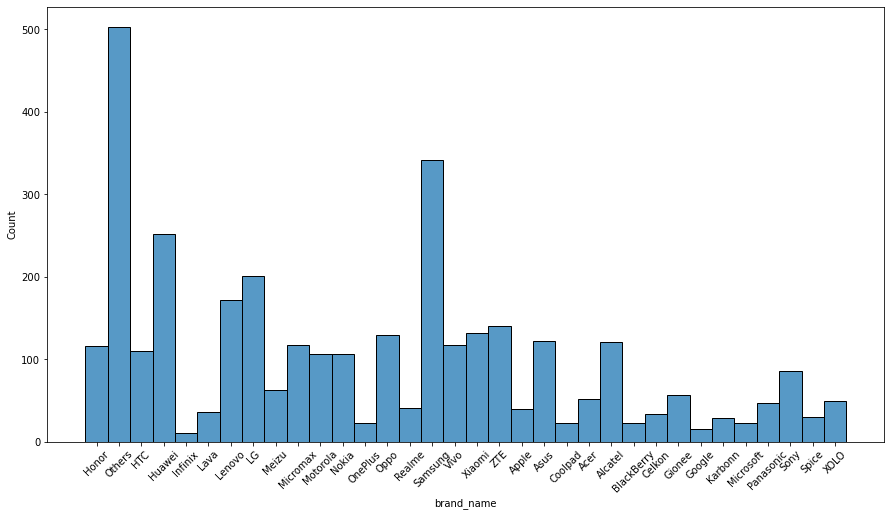

In [ ]:
# Check the distribution by brand name.
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='brand_name');
plt.xticks(rotation=45)
plt.show()

Not counting the 'Others' category, Huawei and Samsung have the most devices in this sample.

The rest of the brands are randomly distributed.

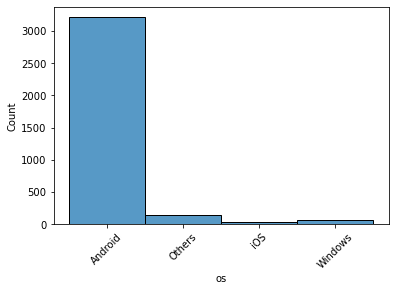

In [ ]:
# Check the distribution of Operating System.
sns.histplot(data=df, x='os');
plt.xticks(rotation=45)
plt.show()

The vast majority of devices are running Android OS.

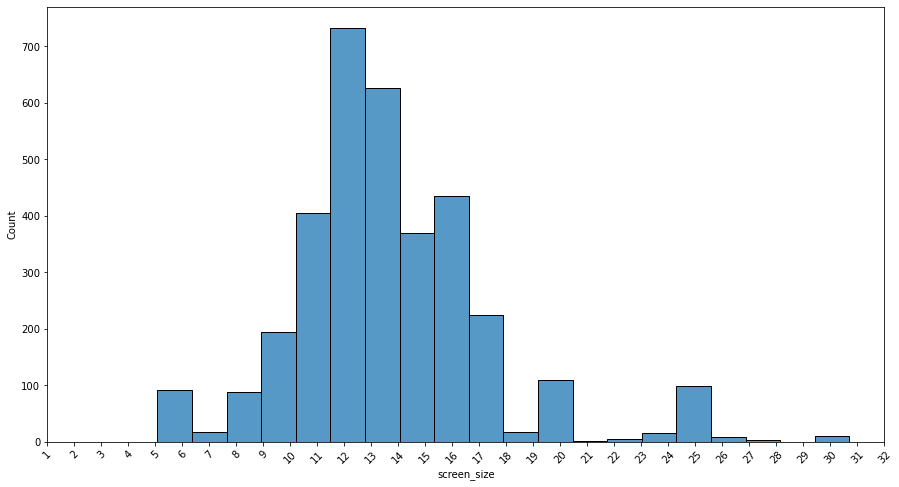

In [ ]:
# Check the distribution of screen size.
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='screen_size', bins=20);
plt.xticks(np.arange(1,33), rotation=45)
plt.show()

Screen size is relatively normally distributed with an extended right tail.

Will use a boxplot to check asses outliers.

There are a few outliers with far right values.

In [ ]:
# define a function to plot boxplots and histograms together for comparison

def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins=None, xticks=None):
  """
  Boxplot and histogram combined
  data: dataframe
  feature: dataframe column
  figsize: size of figure (default 15, 10)
  kde: whether to show  the density curve (default False)
  bins: number of bins for histogram (default None)
  xticks: np.arange(1,10) for example (default None)
  """
  #create the two subplots sharing the x axis and settin box to 25% and hist to 75% of the total plot
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2, #number of rows of the subplot grid = 2
      sharex=True, # x-axis wil be shared among the subplots
      gridspec_kw={'height_ratios': (0.25, 0.75)},
      figsize=figsize
  )
#create the boxplot
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
  )
#create the histogram
  sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
  ) if bins else sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2
  )
  plt.xticks(xticks)
#add two vertical lines, green for the mean and black for the median
  ax_hist2.axvline(
      data[feature].mean(), color='green', linestyle='--'
  )
  ax_hist2.axvline(
      data[feature].median(), color='black', linestyle='--'
  )

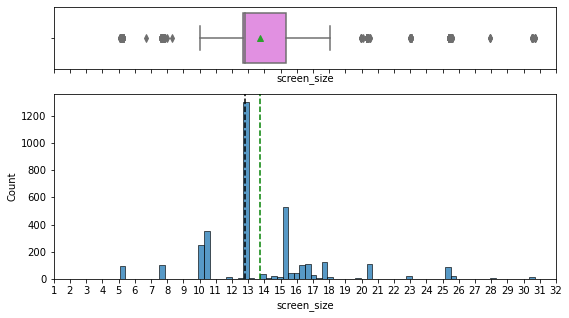

In [ ]:
# Create a histogram and boxplot together to assess outliers.
histogram_boxplot(df, 'screen_size', figsize=(9,5), xticks=(np.arange(1,33)))

There are a several clusters of outliers on the left tail and more on the right, with a few far right outliers.

The mean is right of the median which makes sense because of the far right outliers.

Most devices have a screen size of about 13cm, with a second mode at about 15.25 cm.

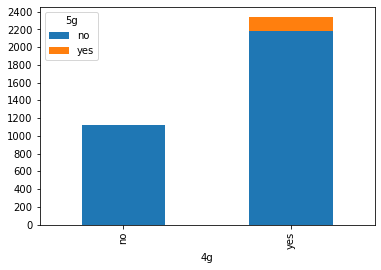

In [ ]:
# Visualize 4g and 5g compared to those without either capability.
pd.crosstab(df['4g'],df['5g']).plot(kind='bar', stacked=True)
plt.yticks(np.arange(0,2500, 200))
plt.show()

In [ ]:
# confirming that rows with 'no' 4g also do NOT have 5g
df.loc[(df['4g']=='no') & (df['5g']=='yes')].shape

(0, 15)

In [ ]:
# Break down the 4g and 5g statuses into percentages.
print(round(df[df['4g']=='yes'].shape[0]/df.shape[0], 2)*100,
      '% (',df[df['4g']=='yes'].shape[0],') devices have 4G', sep='')  
      
print(round(df[df['5g']=='yes'].shape[0]/df.shape[0],2)*100,
      '% (', df[df['5g']=='yes'].shape[0], ') have 5g in addition to 4g.', sep='')

print(round(df[df['4g']=='no'].shape[0]/df.shape[0], 2)*100,
      '% (',df[df['4g']=='no'].shape[0],') do not have 4g or 5g.', sep='') 

68.0% (2335) devices have 4G
4.0% (152) have 5g in addition to 4g.
32.0% (1119) do not have 4g or 5g.


68% of devices have 4g.

4% of devices also have 5g.

32% of devices do not have 4g or 5g.

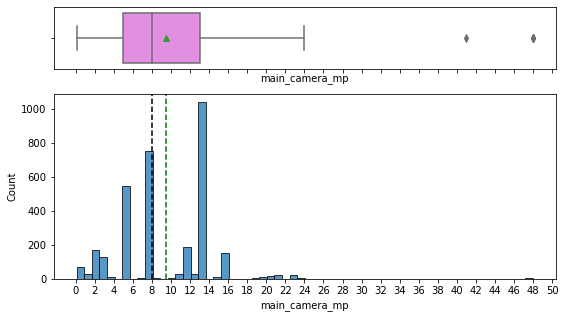

In [ ]:
# check the distribution of main camera megapixels values
histogram_boxplot(df, 'main_camera_mp', figsize=(9,5), bins=60,xticks=(np.arange(0,51,2)))

Main Camera MP has a long right skew due to a very small number of very far outliers.

Will assess outliers further, and treat as necessary during data preprocessing and model construction.

Median and mean are separate, median may be better for imputation.

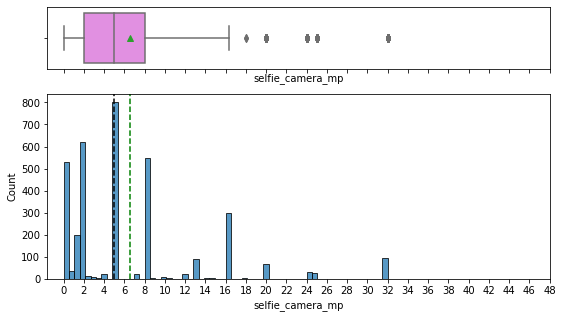

In [ ]:
# check the distribution of selfie camera megapixel values
histogram_boxplot(df, 'selfie_camera_mp', figsize=(9,5), bins=60, xticks=np.arange(0,50,2))

The selfie camera MP distribution also has a long right skew with a very small number of far rith outliers.

Will assess and treat outliers in data preprocessing and model construction.

Median and mean are separated, median may be the better choice for imputation.

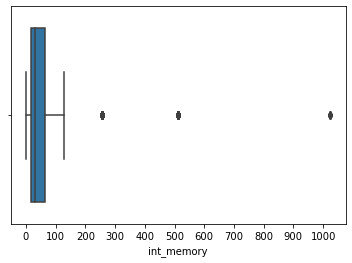

In [ ]:
# check for distributuion and outliers of internal memory.
sns.boxplot(data=df, x='int_memory');
plt.xticks(np.arange(0,1100, 100))
plt.show()

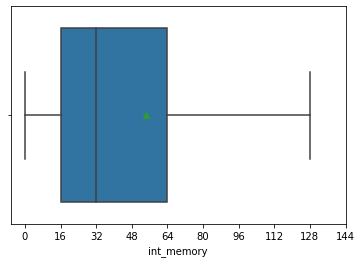

Internal Memory Mean: 54.573098550724644


In [ ]:
# Turn off the outliers to better assess the majority, median, and mean.
sns.boxplot(data=df, x='int_memory', showfliers=False, showmeans=True);
plt.xticks(np.arange(0,150, 16))
plt.show()

print('Internal Memory Mean:', df['int_memory'].mean())

Internal Memory has a few outliers with far right values, up to 1gb.

The majority have 128gb or less, with the IQR having from 16 to 64 and a meadian of 32gb.  

The outliers cause a right skew as evidenced by pulling the mean away from the median to ~55gb.

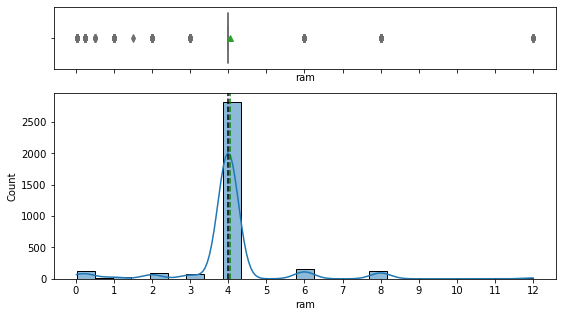

In [ ]:
# check the distribution of ram.
histogram_boxplot(df, 'ram', kde=True, bins=25, figsize=(9,5), xticks=np.arange(0,13,1))

Ram is somewhat normally distributed with most devices having around 4gb. The curve is very steep with long, flat tails and outliers to the right.

Median and mean are approximately the same, either may be suitable for imputation.

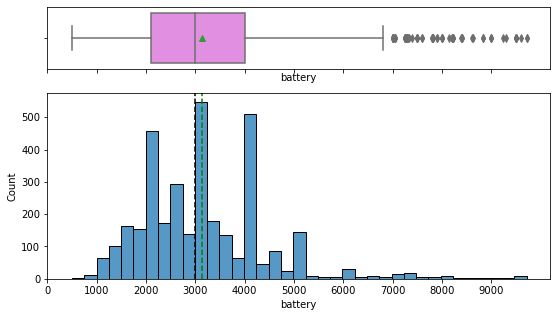

In [ ]:
histogram_boxplot(df, 'battery', figsize=(9,5), xticks=(np.arange(0,10000, 1000)))

Battery has a multimodal distributuion with a long right tail due to outliers.

Median and Mean are close at approximately the same value, so either may be suitable for imputation.

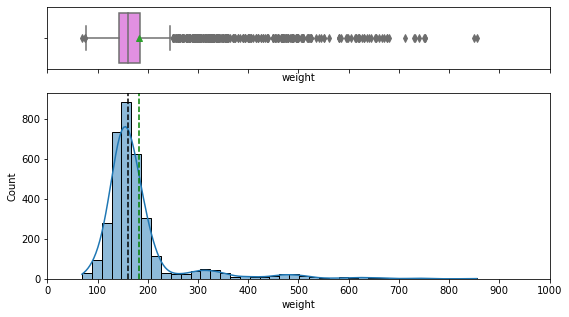

In [ ]:
histogram_boxplot(df, 'weight', kde=True, figsize=(9,5), bins=40, xticks=np.arange(0,1001, 100))

Most of the weight data is normally distributed, if you exclude far right outliers that draw a long flat right skew tail.

Median will be a better treatment than mean because of the right skew.

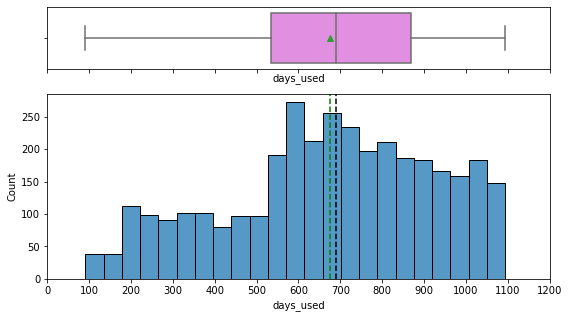

In [ ]:
# create a histogram and boxplot for days used
histogram_boxplot(df, 'days_used', figsize=(9,5), xticks=(np.arange(0,1201, 100)))

Days used is not normally distributed, it is closer to uniform.

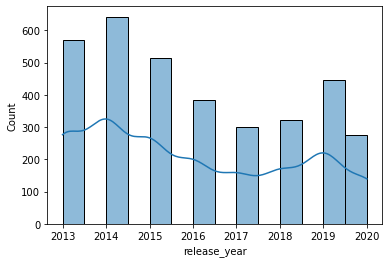

In [ ]:
# check the distribution of release year
sns.histplot(data=df, x='release_year', kde=True);

The distribution of release year is not normally distributed.  

As expected, there are more devices in the used market that are older, but there is an interesting spike in 2019.

## EDA Bivariate Analysis

***Always start with comparing features to the target variable***

In [ ]:
# get the column names
df.columns.tolist()

['brand_name',
 'os',
 'screen_size',
 '4g',
 '5g',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [25]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
len(num_cols)

11

In [38]:
df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


<AxesSubplot:>

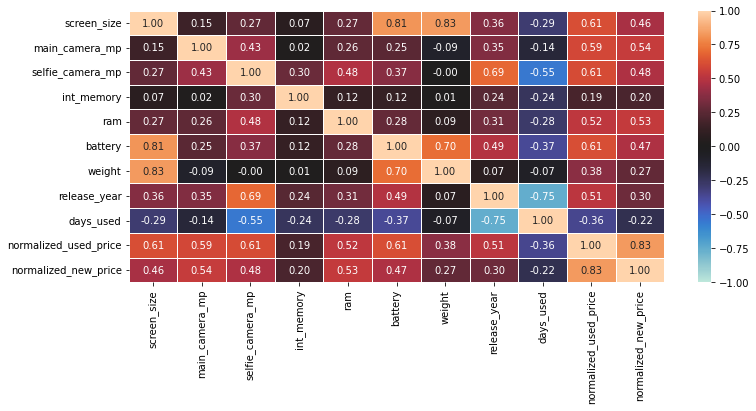

In [32]:
# always start with checking correlation
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, fmt='.2f',linewidth=0.5, cmap='icefire', vmin=-1, vmax=1)

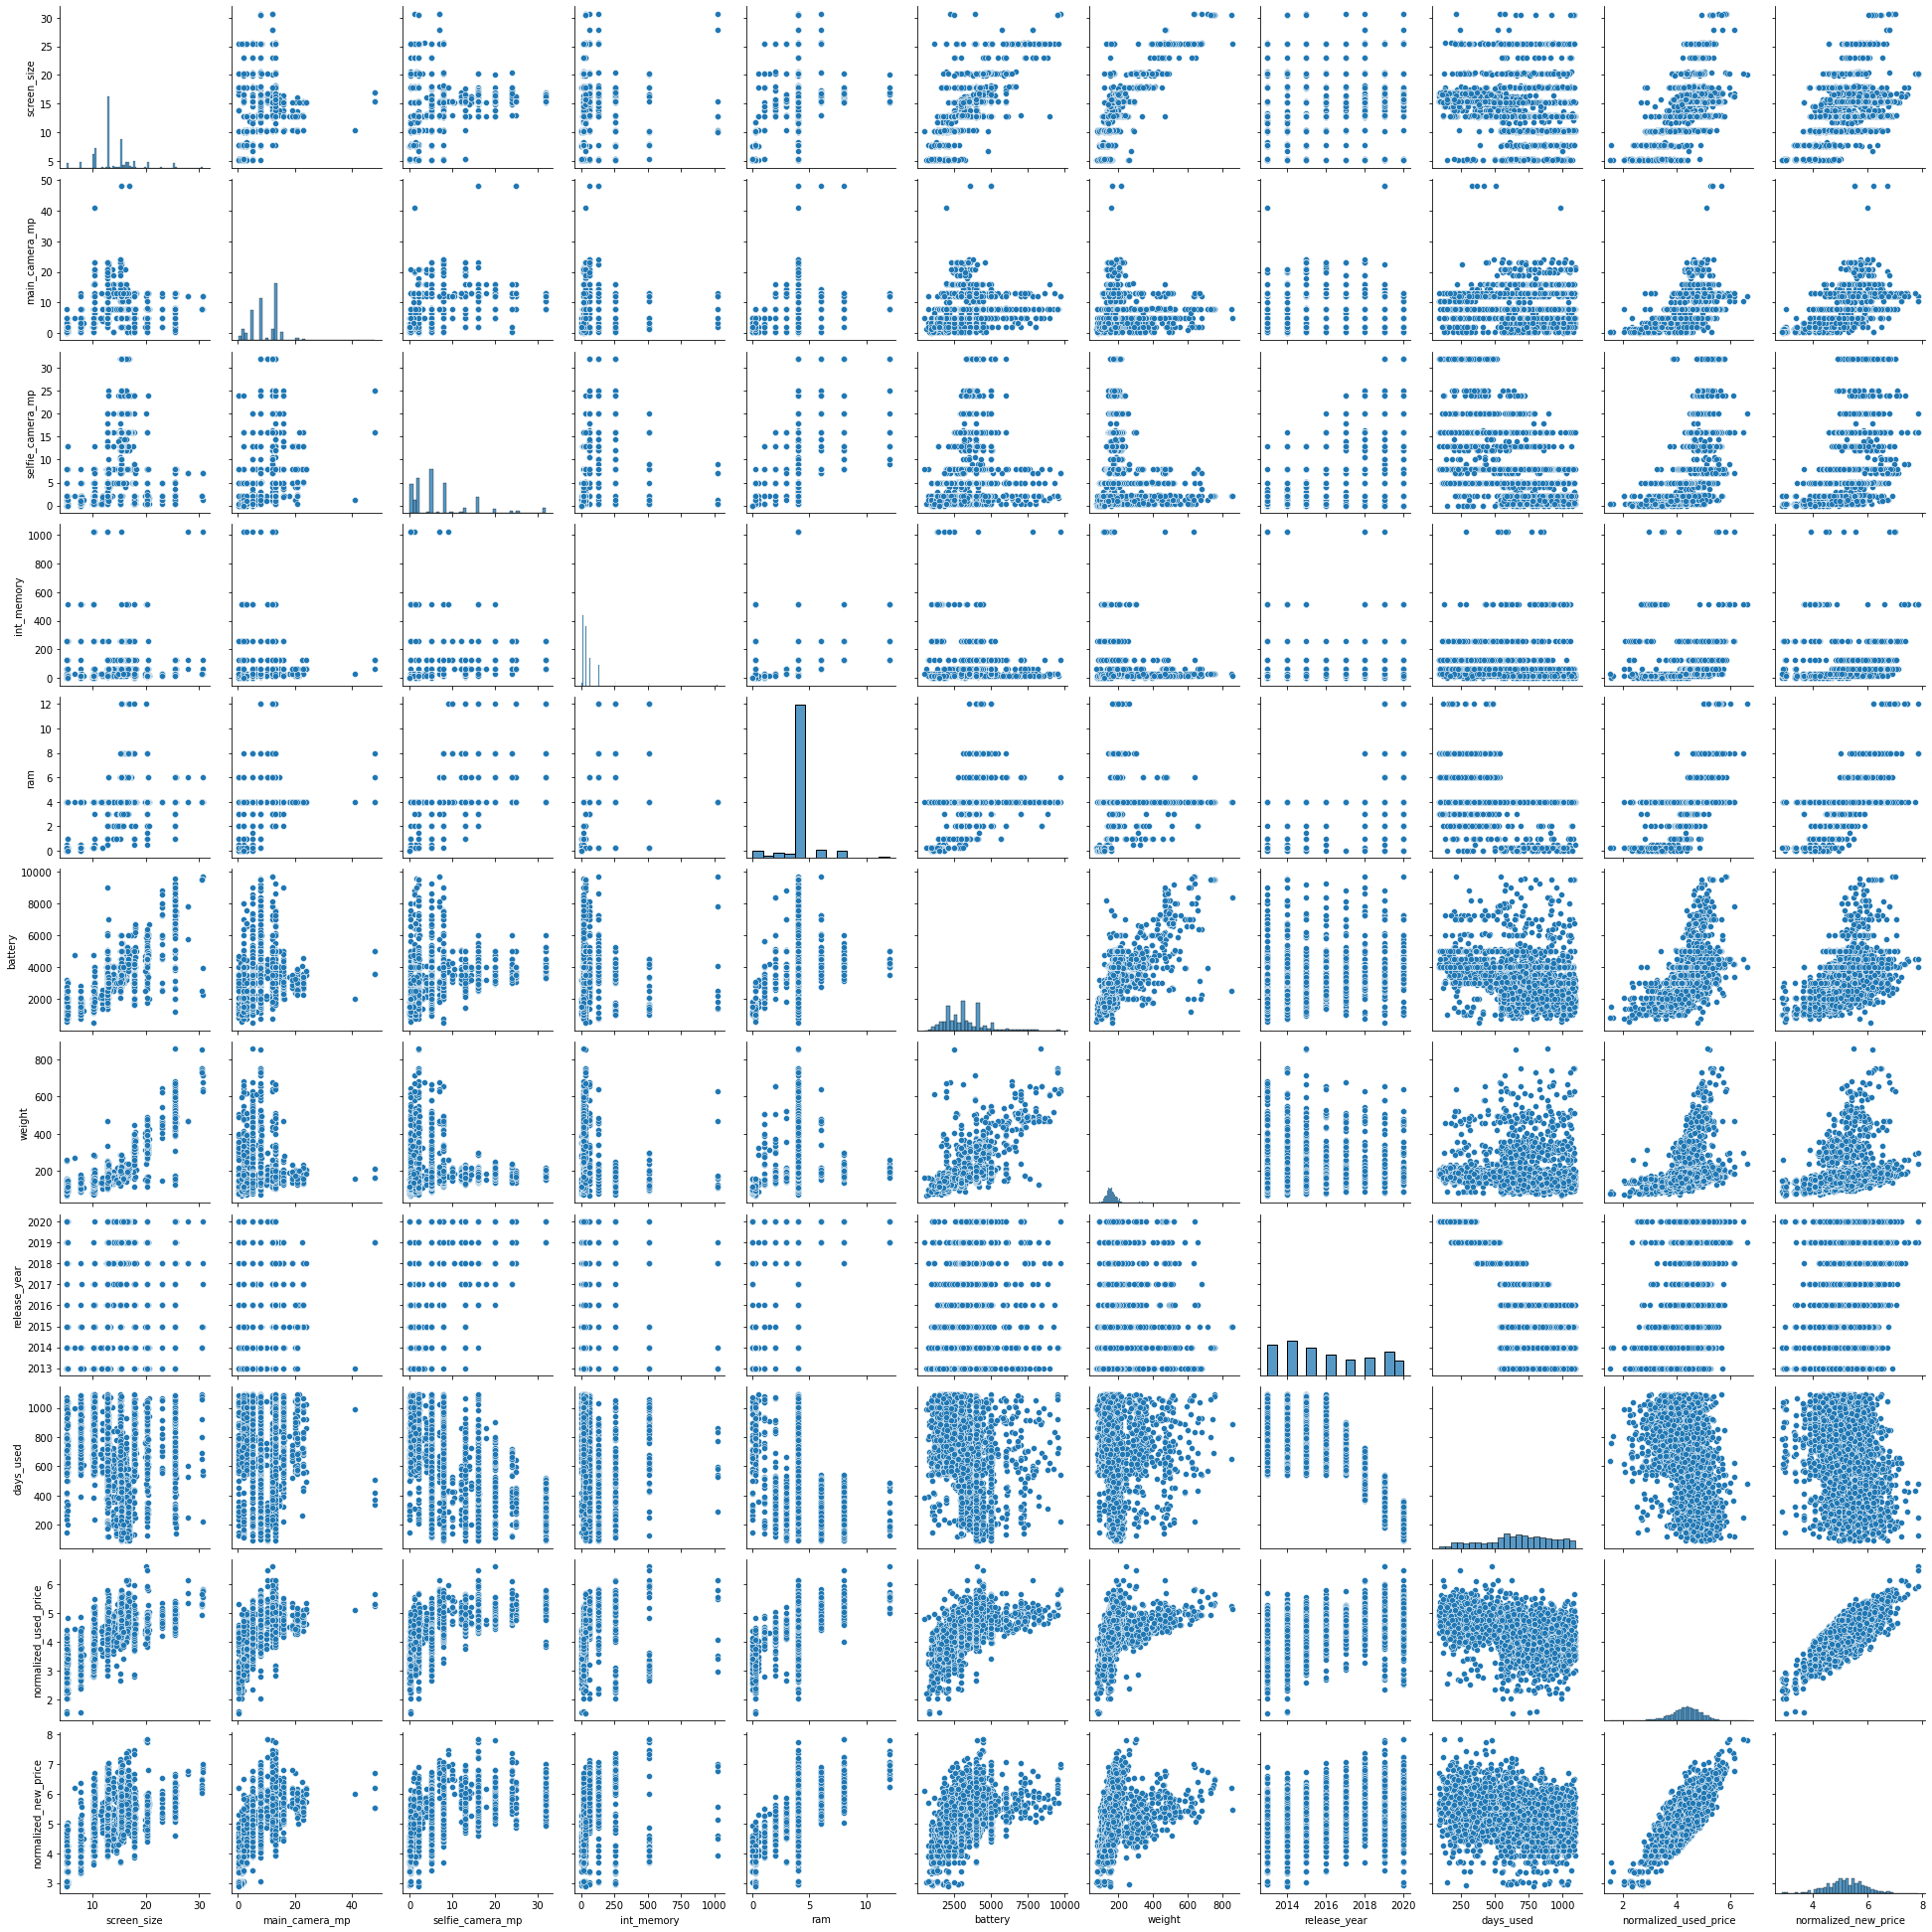

In [ ]:
# Create a pairplot to generally analyze relationships between all numerical features.
sns.pairplot(data=df);

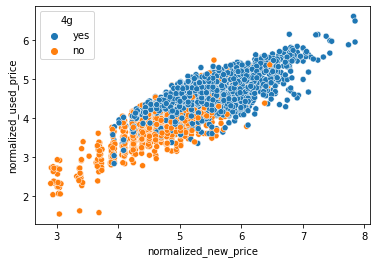

In [ ]:
# Scatterplot comparing used price to new price and 4g. We already know that if 'no' in 4g, it is also 'no' in 5g.
sns.scatterplot(data=df, x='normalized_new_price', y='normalized_used_price', hue='4g');

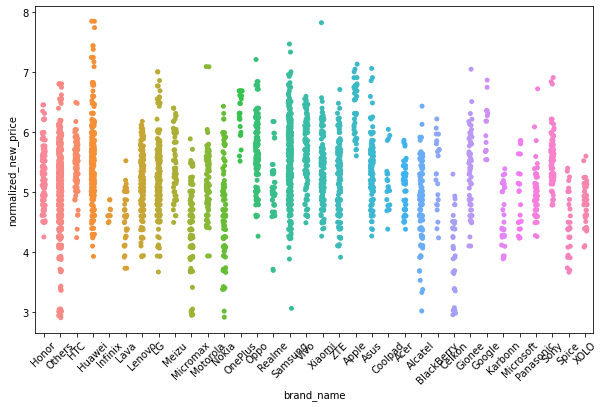

In [ ]:
# stripplot to see new price by brand
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='brand_name', y='normalized_new_price',);
plt.xticks(rotation=45)
plt.show()

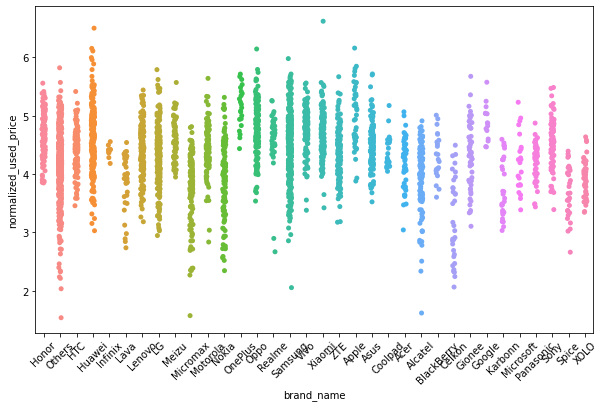

In [ ]:
# stripplot to see used price by brand
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='brand_name', y='normalized_used_price',);
plt.xticks(rotation=45)
plt.show()

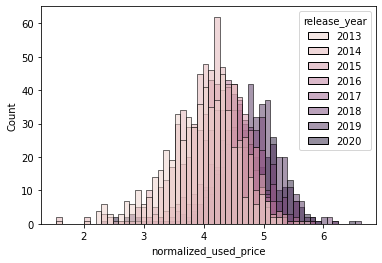

In [ ]:
# plot distribution of used price by release year
sns.histplot(data=df, x='normalized_used_price', hue='release_year');

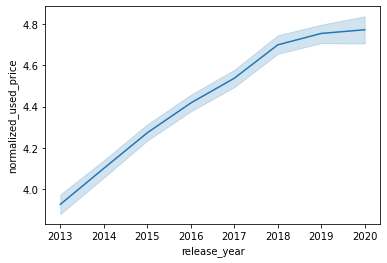

In [ ]:
# plot the mean used price by year
sns.lineplot(data=df, x='release_year', y='normalized_used_price');

Despite the spike in used phones from 2019:
- The distribution of prices is similar to other years
- The mean sales price is as expected when compared to other years

Perhaps COVID in early 2020 led to many people selling or returning their new phones from 2019 as discretionary spending was limited.

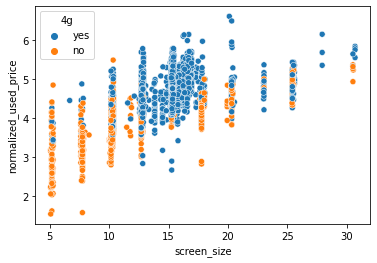

In [ ]:
# Scatterplot comparing used price to screen size and 4g status.
sns.scatterplot(data=df, x='screen_size', y='normalized_used_price', hue='4g');

Phones without 4g tend to have smaller screens and lower used prices.

As expected, larger screens tend to foster higher used prices.

Will check the impact to new price below.

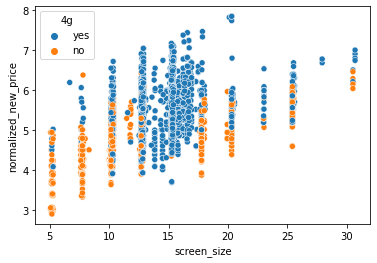

In [ ]:
# Scatterplot comparing new price to screen size and 4g status.
sns.scatterplot(data=df, x='screen_size', y='normalized_new_price', hue='4g');

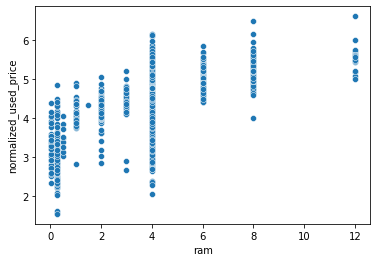

In [ ]:
# Scatterplot comparing used price to ram.
sns.scatterplot(data=df, x='ram', y='normalized_used_price');

An increase in RAM tends to correspond to a higher used sales price, in general.

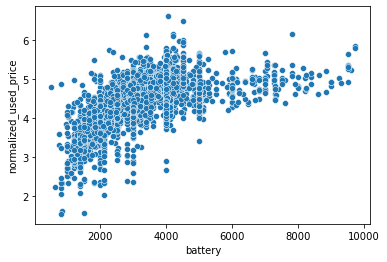

In [ ]:
# Scatterplot comparing used price to battery.
sns.scatterplot(data=df, x='battery', y='normalized_used_price');

Battery size has a positive, linear correlation to used price up to about 4500mAh. Devices with batteries larger than that tend to not affect used price. It tends to have a sigmoidially curve.

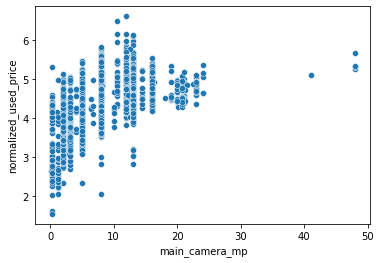

In [ ]:
# Scatterplot comparing used price to main camera MP.
sns.scatterplot(data=df, x='main_camera_mp', y='normalized_used_price');

Main camera mega pixel rating has a positive linear relationship up to about 12 MP.  Beyond this, the impact to used price is negligable.  It tends to have a sigmoidially curve.

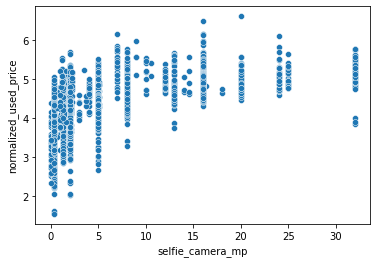

In [ ]:
# Scatterplot comparing used price to selfie camera MP.
sns.scatterplot(data=df, x='selfie_camera_mp', y='normalized_used_price');

Selfie Camera MP rating also starts out positively linear, up to about 16 MP.  Beyond that it has little affect on used price.

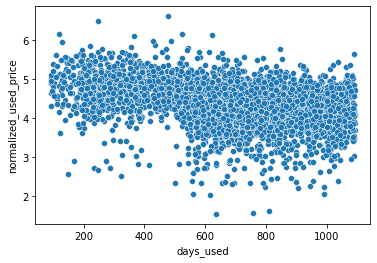

In [ ]:
# Scatterplot comparing used price to days used.
sns.scatterplot(data=df, x='days_used', y='normalized_used_price');

Days used has a very slight negative trending linearity to used price.  As a device has more days used, or is older, the price drops, but not by much.

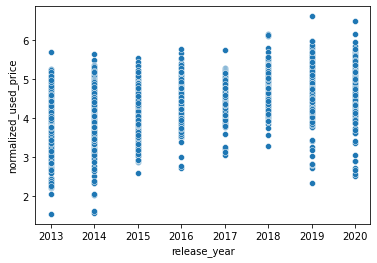

In [ ]:
# scatterplot to see how release year affects used price.
sns.scatterplot(data=df, x='release_year', y='normalized_used_price');

Release year has a very slight positive relationship to used price. 

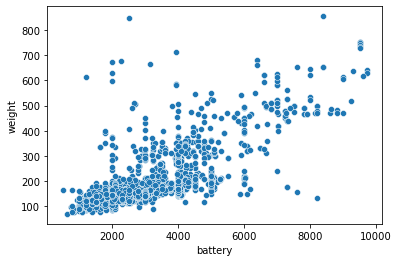

In [ ]:
# Scatterplot comparing weight to battery.
sns.scatterplot(data=df, x='battery', y='weight');

As expected, generally, a device with a larger battery tends to weigh more, there is a positive linear relationship.

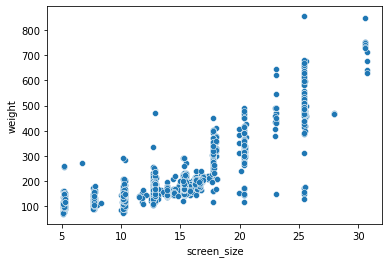

In [ ]:
# Scatterplot comparing weight to screen size.
sns.scatterplot(data=df, x='screen_size', y='weight');

Screen size has a positive relationship to weight.  However, it tends to look a little more exponential, rather than perfectly linear.

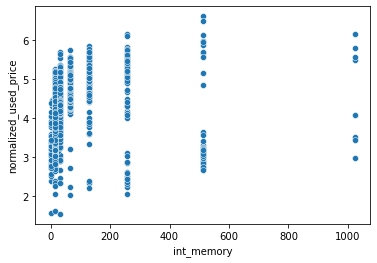

In [ ]:
# Check how internal memory affects used pricing with ouliers included.
sns.scatterplot(data=df, x='int_memory', y='normalized_used_price');

Internal memory appears to have little affect on used price.

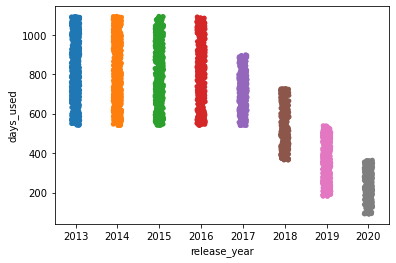

In [ ]:
sns.stripplot(data=df, x='release_year', y='days_used');

## EDA Summary
Used price seems to have the strongest correlation with new price. There is also some positive correlation between used price and other features, such as:
- Screen Size
- Battery
- Ram
- Camera Mega Pixels

There is also a slight negative correlation between used price and days used, or age of the device.

If a device does not have 4g, it also does not have 5g, thus it is a 3g or below phone. Most of these 3g phones have low used prices.  3g phones are concentrated to smaller screen sizes, but do have some across all screen sizes.

Weight also appears to have some correlation with battery and screen size.

Internal Memory has quite a few devices with outlier values.  These values will probably pull down a line of best fit when compared to used price.  The spread on the price of these outlier memory values is quite large, and there is a lot of them. We may want to keep them, but will assess in building the model.

Release year and days used have little correlation to used price.

We will explore these correlations in more depth while building and assesing the ML model.

## EDA specific questions.

### Normalized Price distribution

**What does the distribution of normalized used device prices look like?**

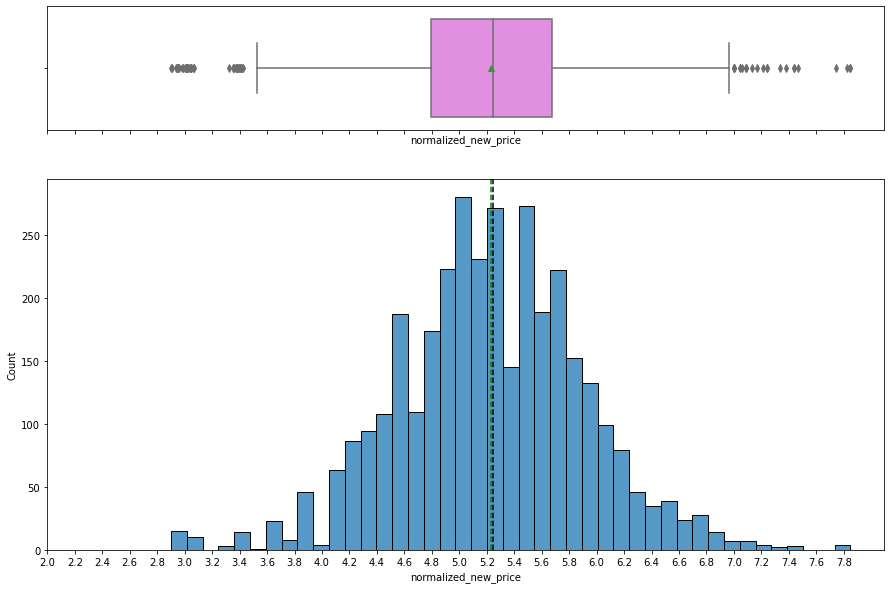

In [ ]:
# create a histogram and boxplot of normalized new price
# set xticks to 0.02 for fidelity on normalized price 
histogram_boxplot(df, 'normalized_new_price', xticks=np.arange(2,8,0.2))

Normalized Used Price is normally distributed with a slightly extended left tail and outliers on both ends.

### Percent of devices running Android

What percentage of the used device market is dominated by Android devices?

In [ ]:
# find percentage of devices using each OS
df['os'].value_counts()/df.shape[0]

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

Anderoid devices account for about 93% of the total used devices sold.

### RAM variation

The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [ ]:
# check the ram by brand name, min, max, and mean


ram = pd.DataFrame()
ram['min'] = df.groupby('brand_name')['ram'].min()
ram['max'] = df.groupby('brand_name')['ram'].max()
ram['mean'] = df.groupby('brand_name')['ram'].mean()
ram['median'] = df.groupby(['brand_name'])['ram'].median()
ram.sort_values(by=['mean'])


,min,max,mean,median
brand_name,,,,
Celkon,0.25,4.0,1.613636,0.25
Nokia,0.02,6.0,2.420294,4.00
Infinix,2.00,4.0,2.600000,2.00
Lava,0.25,4.0,3.277778,4.00
Karbonn,0.25,4.0,3.353448,4.00
Alcatel,0.25,4.0,3.407025,4.00
Micromax,0.25,4.0,3.679487,4.00
Spice,0.25,4.0,3.750000,4.00
Others,0.25,8.0,3.777888,4.00


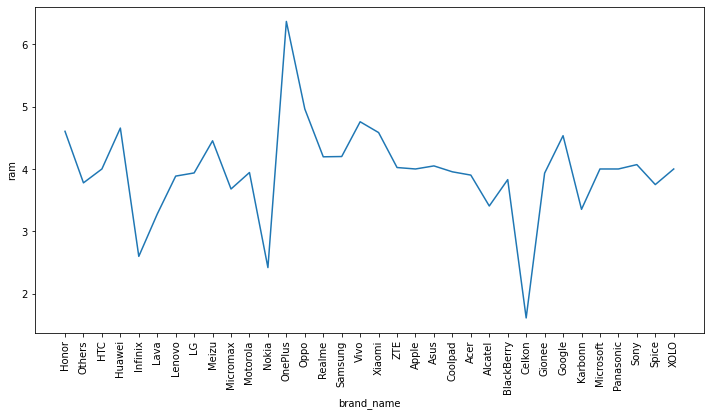

In [ ]:
# plot the mean of ram by brand name
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='brand_name', y='ram', ci=None);
plt.xticks(rotation=90)
plt.show()

The brand with the lowest mean ram is Celkon, averaging 1.61 Gb of ram.

The brand with the highest mean ram is OnePlus with an average of 6.36 Gb of ram.

The overall mean and median for the sample is about 4 Gb of ram.

The vast majority of brands have a median ram of 4 Gb.

### Large battery effect on weight

A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
# get the basic statistical values for weights of devices with batteries >4500mAh
wt_bt = df['weight'][df['battery']>4500]
wt_bt.describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

For devices with a battery greater than 4500 mAh, the mean weight is 332 grams. Weights in this class vary from 118 grams to 855 grams.


### Screens larger than 6 inches
Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
# insert a column for screen size in inches
# rename the screen size column to screen_cm to keep the original cm sizing
df.insert(3,'screen_inches', round(df['screen_size']*0.393701 ,2))
df.rename(columns={'screen_size': 'screen_cm'}, inplace=True)

In [ ]:
# ensure screen_inches feature has been added to the df
df.head(2)

,brand_name,os,screen_cm,screen_inches,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.5,5.71,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.3,6.81,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018


Screen sizes have been recalculated from cm into inches.

In [ ]:
# create a dataframe of the devices with screens greater than 6 inches
screen_gtr_6 = df[df['screen_inches']>6]

# count the number of devices per brand_name with greater than 6 inches
screen_gtr_6['brand_name'].value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

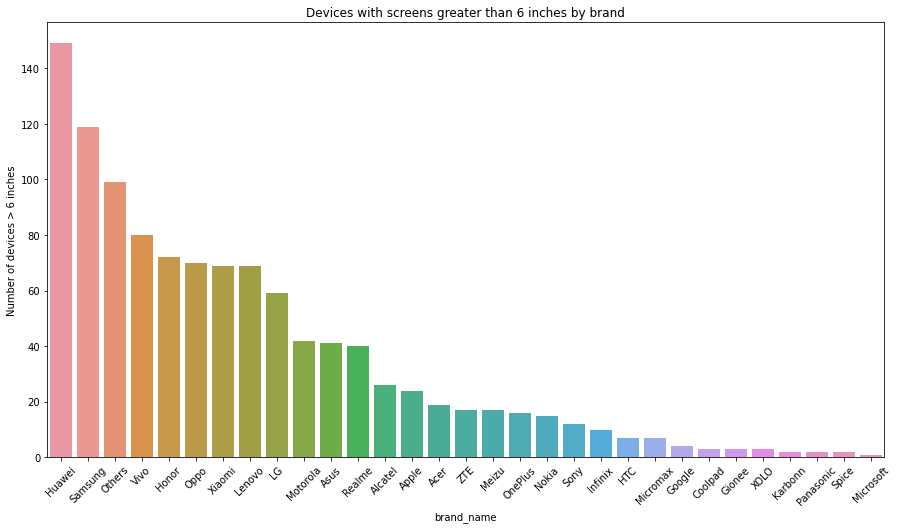

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=screen_gtr_6, x='brand_name',
              order=screen_gtr_6['brand_name'].value_counts().index);
plt.xticks(rotation=45)
plt.ylabel('Number of devices > 6 inches')
plt.title('Devices with screens greater than 6 inches by brand')
plt.show()

Huawei and Samsung offer the most devices with screens greater than 6 inches, with 157 and 131 devices, respectively.


### Selfie Camera > 8MP distribution

A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
# create a dataframe with only the rows where the selfie camera mp is greater than 8mp
mp8 = df[df['selfie_camera_mp']>8]
mp8

,brand_name,os,screen_cm,screen_inches,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,6.81,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,6.03,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,6.57,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,6.03,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,6.26,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,5.022366,5.517935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,Samsung,Android,15.34,6.04,yes,no,12.0,16.0,32.0,3.0,4000.0,169.0,2019,369,4.760377,5.049151
3439,Samsung,Android,15.34,6.04,yes,no,12.0,32.0,64.0,4.0,4000.0,169.0,2019,315,5.137092,5.443240
3440,Samsung,Android,15.44,6.08,yes,no,12.0,10.0,256.0,12.0,4300.0,196.0,2019,489,5.200153,6.509499
3441,Samsung,Android,15.32,6.03,yes,no,12.0,10.0,256.0,8.0,3500.0,168.0,2019,429,5.205050,6.250940


There are 655 devices in this data set with selfie cameras having >8MP.

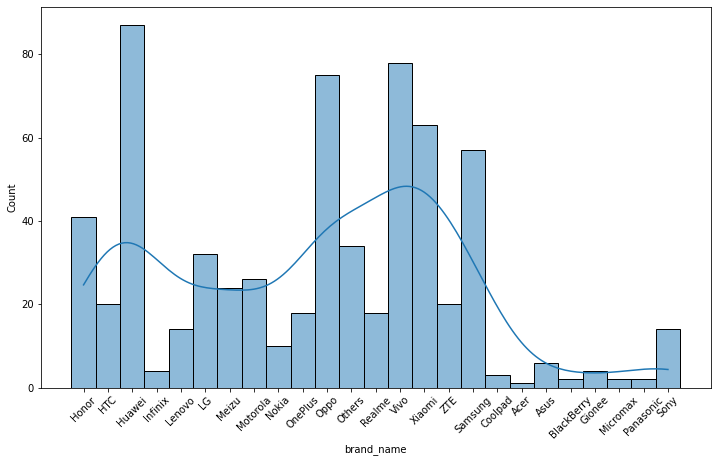

In [ ]:
# Plot total devices with >8mp by brand
plt.figure(figsize=(12,7))
sns.histplot(data= mp8, x= 'brand_name', kde=True);
plt.xticks(rotation=45)
plt.show()

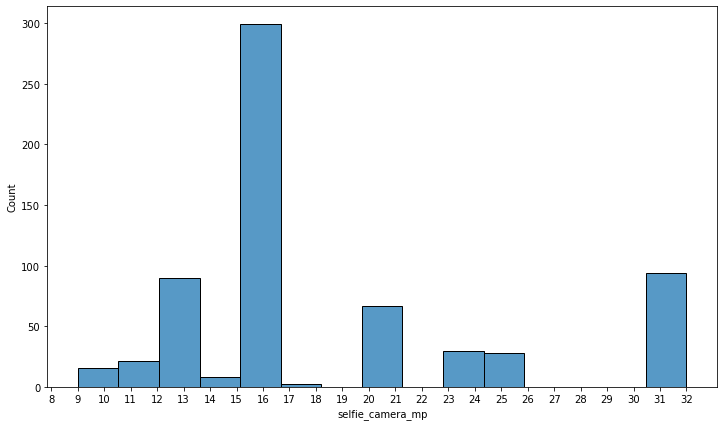

In [ ]:
# Plot the distribution of total devices with >8mp by mp values
plt.figure(figsize=(12,7))
sns.histplot(data=mp8, x='selfie_camera_mp', bins=15);
plt.xticks(np.arange(8,33))
plt.show()

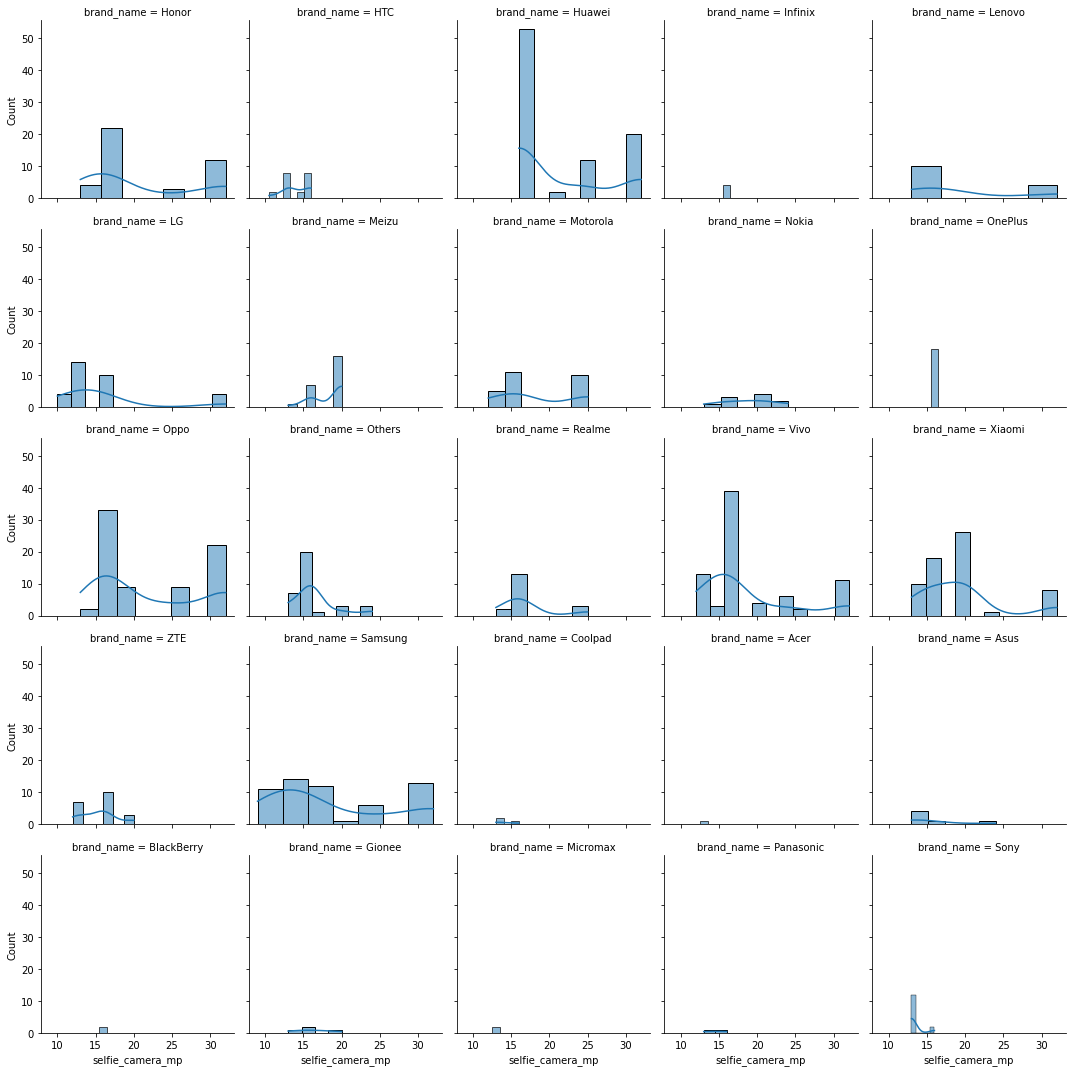

In [ ]:
# plot each brand's distribution of devices with >8mp by mp values
g = sns.FacetGrid(mp8, col='brand_name', col_wrap=5)
g.map(sns.histplot,'selfie_camera_mp', kde=True);

Huawei, Xiaomi, Oppo, and Samsung offer the most devices with greater than 8 megapixel selfie cameras.

Across all devices, the distribution is random, with a high spike mode at about 16mp. This varies from brand-to-brand, however.

### Attributes correlated to price

Which attributes are highly correlated with the normalized price of a used device?

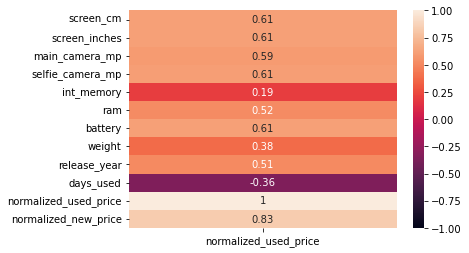

In [ ]:
# create a heatmap of used price correlation to all other features
corr = df.corr()[['normalized_used_price']]
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

Normalized Used Price is most closely correlated with Normalized New Price a 83% positive correlation. This is not surprising.

Other features farily correlated with Used Price are Screen Size, Main and Selfie Camera Mega Pixels, and Battery. 

The only negative correlation to price is Days Used, which is rather weak at a negative 31% corralation.

Internal Memory and Weight don't really seem to affect used price, they have weak correlation to Normalized Used Price.

# Data Preprocessing

Some ways of treating mission values

- Drop the missing values
- Impute the missing values
-- Using central tendency measures (mean, median, mode) of a column 
-- With mean: Missing values are imputed with the mean of the column. Preferred for continuous data with no outliers
-- With median: Missing values are imputed with the median of the column. Preferred for continuous data with outliers
-- With mode: Missing values are imputed with the mode of the column. Preferred for categorical data
- Using central tendency measures (mean, median, mode) of a column grouped by categories of a categorical column: Preferred for cases where the data under similar categories of a categorical column are likely to have similar properties

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Missing Value Treatment

In [ ]:
# get the number of null values in the dataset my feature.
df.isnull().sum()

brand_name                 0
os                         0
screen_cm                  0
screen_inches              0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Main Camera Mega Pixel has the most missing data.  Will confirm the missing values are NaNs and then replace with median.  179 is too many rows to just delete so first we will impute with the median. This feature has some outliers far to the right, and the mean and median are not together.  Therefore, the Median may be the better value to impute this missing data.  

In [ ]:
# features missing data are dtype int or float, double check for NaNs
df[df['main_camera_mp'].isnull()==True]

,brand_name,os,screen_cm,screen_inches,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,6.82,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,6.06,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,6.06,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,6.06,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,6.02,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,6.04,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,6.03,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,6.03,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,6.59,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


### Assess the Central Tendencies

In [ ]:
# mean of numeric columns
df.mean(numeric_only=True)

screen_cm                  13.713115
screen_inches               5.398497
main_camera_mp              9.460208
selfie_camera_mp            6.554229
int_memory                 54.573099
ram                         4.036122
battery                  3133.402697
weight                    182.751871
release_year             2015.965258
days_used                 674.869716
normalized_used_price       4.364712
normalized_new_price        5.233107
dtype: float64

In [ ]:
# Median of numeric columns.
df.median(numeric_only=True)

screen_cm                  12.830000
screen_inches               5.050000
main_camera_mp              8.000000
selfie_camera_mp            5.000000
int_memory                 32.000000
ram                         4.000000
battery                  3000.000000
weight                    160.000000
release_year             2015.500000
days_used                 690.500000
normalized_used_price       4.405133
normalized_new_price        5.245892
dtype: float64

In [ ]:
# find the modes of the two categorical features, brand name and os.
print(df['brand_name'].mode())
print('\n', df['os'].mode())

0    Others
Name: brand_name, dtype: object

 0    Android
Name: os, dtype: object


The most common brand name is Others.

The most common Operating System is Android.

During EDA it was discovered that median may be best choice to impute Main Camera MP. Selfie Camera MP, Weight, and Battery have right skews as well. Ram has outliers on left and right, and the mean and median are nearly the same.

All the features with missing values are numerical.

Due to these considerations, we will impute all the missing values with median.

In [ ]:
# repalce NaNs with medians
df = df.fillna(df.median(numeric_only=True))

In [ ]:
df.isnull().sum()

brand_name               0
os                       0
screen_cm                0
screen_inches            0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All missing data has been replaced with the median for the respective feature.

## Feature Engineering

- Will drop screen_cm

In [ ]:
# drop screen_cm, maintain screen_inches
df.drop(['screen_cm'], axis=1, inplace=True)
df.head(1)

,brand_name,os,screen_inches,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,5.71,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.7151


## Outlier detection and treatment

5


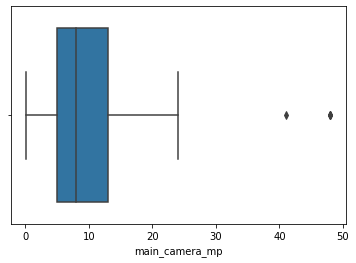

In [ ]:
# assess outliers in main camera mp.
sns.boxplot(data=df, x='main_camera_mp');
print(df[df['main_camera_mp']>=40].shape[0])

There are only 5 devices with outliers in main camera mp.

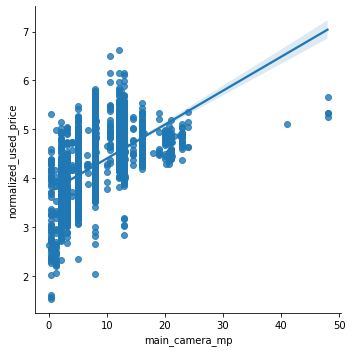

In [ ]:
# check the line of best fit for main camera mp to price with outliers in place
sns.lmplot(data=df, x='main_camera_mp', y='normalized_used_price');

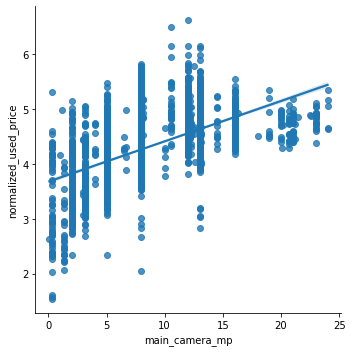

In [ ]:
# check the line of best fit for main camera mp to price not including outliers, (mp>40)
sns.lmplot(data=df[df['main_camera_mp']<40], x='main_camera_mp', y='normalized_used_price');

The outliers in main camera mp do pull down the line of best fit slightly.  We will remove them since there is only 5.  This will ensure these outliers are not affecting the model.

In [ ]:
# keep only the rows with main camera mp <40, this will remove the 5 rows with outliers in this feature
df=df.loc[df['main_camera_mp']<40]
df.shape

(3449, 15)

The rows with devices having main camera mp greater than 40 have been droped from the dataframe.

Total rows has been reduced from 3454 to 3499.

94
219


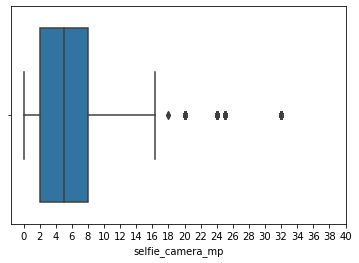

In [ ]:
# assess outliers in selfie camera mp
sns.boxplot(data=df, x='selfie_camera_mp');
plt.xticks(np.arange(0,41, 2))
print(df[df['selfie_camera_mp']>=30].shape[0])
print(df[df['selfie_camera_mp']>=17].shape[0])

There are 94 outliers with 30 or more mp.

There are 221 devices with outliers of 17 or more mp.

This may be too many to drop since the other data is all good data.

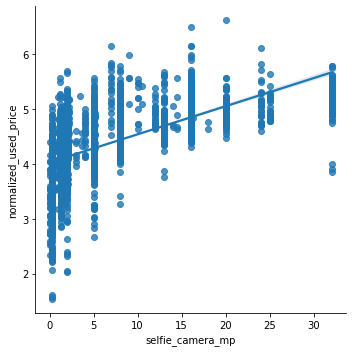

In [ ]:
# check initial line of best fit with outliers included to assess how selfie camera mp affects used price. 
sns.lmplot(data=df, x='selfie_camera_mp', y='normalized_used_price');

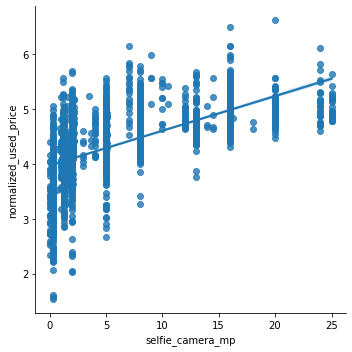

In [ ]:
# check initial line of best fit with outliers not included to assess how selfie camera mp affects used price. 
sns.lmplot(data=df[df['selfie_camera_mp']<30], x='selfie_camera_mp', y='normalized_used_price');

The large number of ouliers does tend to pull down the line of best fit.  Will assess further during model construction.

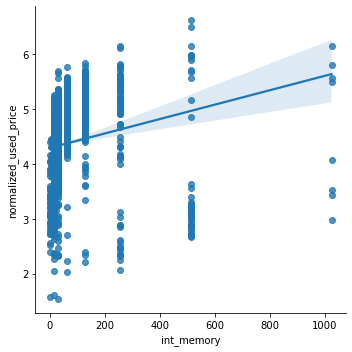

In [ ]:
# Check how internal memory affects used pricing with ouliers included.
sns.lmplot(data=df, x='int_memory', y='normalized_used_price');

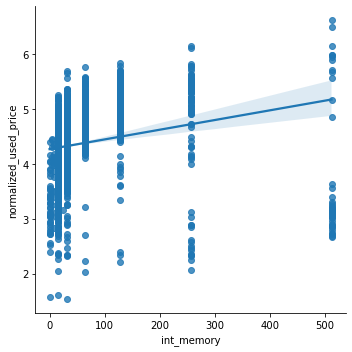

In [ ]:
# compare affect on used price without the outlier values in internal memory.
sns.lmplot(data=df[df['int_memory']<600], x='int_memory', y='normalized_used_price');

When some of the higher outliers are removed there is an effect on the line of best fit.  However, there are a lot of devices in the outlier category so dropping or modifying may not be best. Additionally, there is a wide spread of prices, even at the higher internal memory levels, which further shows that removing them may not be best.   We will do further analysis during model building and tuning.

## EDA
Post pre-processing.

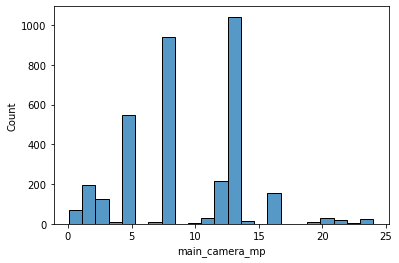

In [ ]:
sns.histplot(data=df, x='main_camera_mp');

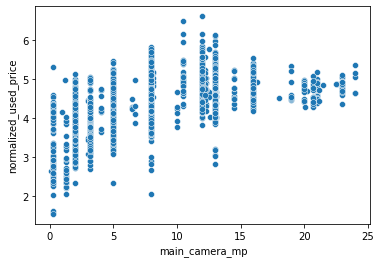

In [ ]:
sns.scatterplot(data=df, x='main_camera_mp', y='normalized_used_price');

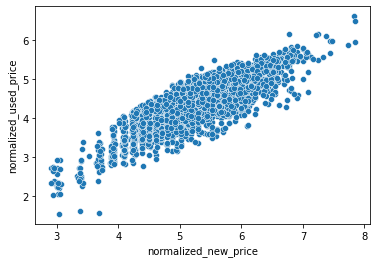

In [ ]:
sns.scatterplot(data=df, x='normalized_new_price', y='normalized_used_price');

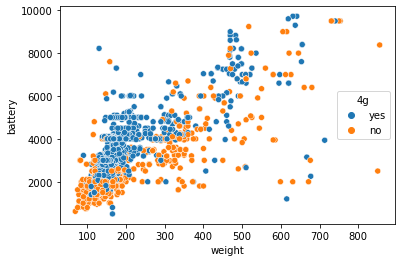

In [ ]:
sns.scatterplot(data=df, x='weight', y='battery', hue='4g');

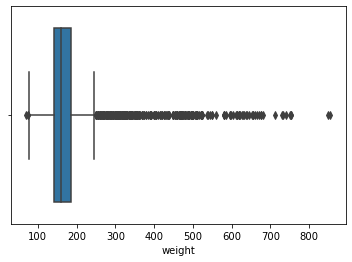

In [ ]:
sns.boxplot(data=df, x='weight');

Weight and battery still have some positive correlation, but the vast number of right outliers in weight really affect the plot.  There are some devices with high weight and low battery size. 

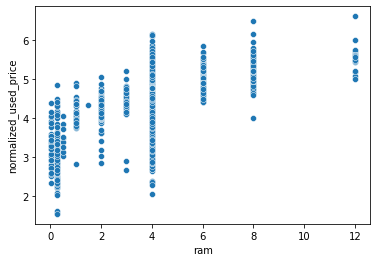

In [ ]:
sns.scatterplot(data=df, x='ram', y='normalized_used_price');

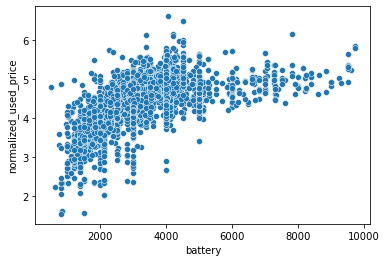

In [ ]:
sns.scatterplot(data=df, x='battery', y='normalized_used_price');

## Data Preparation for Modeling
The objective is to predict the used price of a device
- Split the data
    - Dependent and Independent variables
- Add a constant(y-intercept)
- Encode categorical variables
- Split the data
    - Train and Test data

In [ ]:
# Separate the target, or dependent variable, and the independent variables
x = df.drop(['normalized_used_price'], axis=1)
y = df['normalized_used_price']
print(x.head())
print(y.head())


  brand_name       os  screen_inches   4g   5g  main_camera_mp  \
0      Honor  Android           5.71  yes   no            13.0   
1      Honor  Android           6.81  yes  yes            13.0   
2      Honor  Android           6.57  yes  yes            13.0   
3      Honor  Android          10.04  yes  yes            13.0   
4      Honor  Android           6.03  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.

In [ ]:
# add a constant(intercept) to the x(indpendent) variables
x = sm.add_constant(x)

In [ ]:
# create dummy variables
x = pd.get_dummies(
    x,
    columns = x.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first=True
)
x.head()

,const,screen_inches,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,5.71,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,6.81,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,6.57,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,10.04,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,6.03,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


The constant column has been added and dummy variables have been created for 'brand_name', 'os', and 4g/5g.

In [ ]:
# split the data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2414
Number of rows in test data = 1035


# Model Building - Linear Regression

In [ ]:
# run the initial OLS model
olsmod = sm.OLS(y_train, x_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     270.6
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:55   Log-Likelihood:                 124.41
No. Observations:                   2414   AIC:                            -150.8
Df Residuals:                       2365   BIC:                             132.8
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpretation of R-squared

* The R-squared value tells us that our model can explain 84.6% of the variance in the training set.

### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    - Null hypothesis : Predictor variable is not significant 
    - Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, due to the presence of multicollinearity in our data, the p-values will also change.

* We need to ensure that there is no multicollinearity in order to interpret the p-values.

Will check performance metrics prior to fitting and adjusting the data so we can compare with the final model.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmod, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229816,0.17905,0.845967,0.842774,4.312197


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_train_perf = model_performance_regression(olsmod, x_test, y_test)
olsmodel_train_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236815,0.185096,0.840937,0.833024,4.455028


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

- MAPE of 4.4 on the test data means that we are able to predict within 4.4% of the normalized used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Multicollinearity

Will use the Variance Inflation Factor(VIF) to test for multicollinearity.

If VIF exceeds 5, will drop one at a time and recheck VIF.

In [ ]:
# check VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print('VIF values: \n\n',round((vif_series1),3),sep='')

VIF values: 

const                    3731792.236
screen_inches                  7.059
main_camera_mp                 2.273
selfie_camera_mp               2.854
int_memory                     1.280
ram                            2.264
battery                        3.942
weight                         5.537
release_year                   4.814
days_used                      2.589
normalized_new_price           3.236
brand_name_Alcatel             3.274
brand_name_Apple              13.744
brand_name_Asus                3.318
brand_name_BlackBerry          1.607
brand_name_Celkon              1.761
brand_name_Coolpad             1.467
brand_name_Gionee              1.937
brand_name_Google              1.346
brand_name_HTC                 3.162
brand_name_Honor               3.204
brand_name_Huawei              5.801
brand_name_Infinix             1.307
brand_name_Karbonn             1.639
brand_name_LG                  4.729
brand_name_Lava                1.627
brand_name_Lenovo       

- The VIF values indicate that screen size, weight, brand names Apple, Huawei, Others, and Samsung, and OS IOS all have correlations.

- However, the brand names and OS are dummy variables and will not be dropped due to multicollinearity.

- Will drop the non-dummy variables with high VIFs one at a time and recheck VIF

In [ ]:
print('Original R-squared:',
      np.round(olsmod.rsquared,3),
      '\nOriginal Adjusted R-squared:',
      np.round(olsmod.rsquared_adj,3)
)

Original R-squared: 0.846 
Original Adjusted R-squared: 0.843


In [ ]:
# check effect of dropping screen size on R-squared
x_train2 = x_train.drop(['screen_inches'], axis=1)
olsmod2 = sm.OLS(y_train, x_train2).fit()
print('R-squared:',
      np.round(olsmod2.rsquared,3),
      '\nAdjusted R-squared:',
      np.round(olsmod2.rsquared_adj,3)
)
      

R-squared: 0.842 
Adjusted R-squared: 0.839


Dropping Screen Size lowers R-squared by 0.004 or 0.4%.

In [ ]:
# check effect of dropping weight on R-squared
x_train3 = x_train.drop(['weight'], axis=1)
olsmod3 = sm.OLS(y_train, x_train3).fit()
print('R-squared:',
      np.round(olsmod3.rsquared,3),
      '\nAdjusted R-squared:',
      np.round(olsmod3.rsquared_adj,3)
)
      

R-squared: 0.843 
Adjusted R-squared: 0.84


Dropping weight lowers R-squared by 0.003 or 0.3%.

Either Screen size in inches or weight could be dropped because the affect on R-squared is small.  

Will drop weight first because the effect on r-squared is smaller, and then recheck VIF scores.

In [ ]:
# Drop 'weight' feature
x_train = x_train.drop(['weight'], axis=1)

In [ ]:
# re-run OLS model
olsmod4 = sm.OLS(y_train, x_train).fit()
print(olsmod4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     269.9
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:56   Log-Likelihood:                 99.771
No. Observations:                   2414   AIC:                            -103.5
Df Residuals:                       2366   BIC:                             174.3
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Dropping 'weight': R-squared reduced by 0.003

Now I will re-run the VIF scores.

In [ ]:
# assess VIF scores after dropping 'weight'
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print('VIF values:\n\n',(round(vif_series2,3)),sep='')


VIF values:

const                    3641701.107
screen_inches                  3.528
main_camera_mp                 2.193
selfie_camera_mp               2.818
int_memory                     1.280
ram                            2.257
battery                        3.624
release_year                   4.695
days_used                      2.581
normalized_new_price           3.232
brand_name_Alcatel             3.273
brand_name_Apple              13.741
brand_name_Asus                3.318
brand_name_BlackBerry          1.607
brand_name_Celkon              1.761
brand_name_Coolpad             1.467
brand_name_Gionee              1.936
brand_name_Google              1.346
brand_name_HTC                 3.161
brand_name_Honor               3.201
brand_name_Huawei              5.800
brand_name_Infinix             1.304
brand_name_Karbonn             1.638
brand_name_LG                  4.729
brand_name_Lava                1.626
brand_name_Lenovo              4.271
brand_name_Meizu         

Screen_inches VIF has dropped as expected.

release_year VIF is 4.7 which is not 5, but is still pretty high.  I will try dropping release_year and see what the effect is.

In [ ]:
# assess effect of dropping 'release_year' on the r2 and adj r2.
x_train5 = x_train.drop(['release_year'], axis=1)
olsmod5 = sm.OLS(y_train, x_train5).fit()
print('R-squared:',
      np.round(olsmod5.rsquared,3),
      '\nAdjusted R-squared:',
      np.round(olsmod5.rsquared_adj,3)
)
      

R-squared: 0.841 
Adjusted R-squared: 0.838


Dropping 'release_year': lowers R-squred by 0.002.

Will drop release year from model and reassess VIFs

R-squared reduced only slightly, from 0.846 to 0.841, as expected.  Will recheck VIFs with 'release_year' removed.

In [ ]:
x_train = x_train.drop(['release_year'], axis=1)
olsmod6 = sm.OLS(y_train, x_train).fit()
print(olsmod6.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     272.7
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:56   Log-Likelihood:                 88.115
No. Observations:                   2414   AIC:                            -82.23
Df Residuals:                       2367   BIC:                             189.9
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print('VIF values:\n\n', round(vif_series3, 3), sep='')


VIF values:

const                    208.206
screen_inches              3.508
main_camera_mp             2.172
selfie_camera_mp           2.430
int_memory                 1.270
ram                        2.257
battery                    3.560
days_used                  1.819
normalized_new_price       3.020
brand_name_Alcatel         3.273
brand_name_Apple          13.721
brand_name_Asus            3.317
brand_name_BlackBerry      1.605
brand_name_Celkon          1.749
brand_name_Coolpad         1.466
brand_name_Gionee          1.935
brand_name_Google          1.338
brand_name_HTC             3.161
brand_name_Honor           3.199
brand_name_Huawei          5.799
brand_name_Infinix         1.303
brand_name_Karbonn         1.633
brand_name_LG              4.729
brand_name_Lava            1.626
brand_name_Lenovo          4.269
brand_name_Meizu           2.160
brand_name_Micromax        3.333
brand_name_Microsoft       1.871
brand_name_Motorola        3.203
brand_name_Nokia           3.3

**Observations**
There is no mulitcollinearity left in the model, other than the categorical variables.  

'weight' and 'release_year' had little impact on the model and have been dropped.

Now that the multicollinearity has been removed, we can trust the p-value and will drop non-significant features(p-value < 0.05).

### Dealing with high p-value variables/ Fit The Model

- Some of the dummy variables have p-value > 0.05.  They are not significant so we will drop them.

- Because the p-values of other variable can change after dropping a variable, they must be dropped one at a time.

- I will drop the variable with the highest p-value, days_used, manually. The I will recheck and drop the next highest variable, battery.

  - There are many categorical variables with p-values > 0.05.  I will define a function to automate the process of removing these categorical variables one-at-a-time with rechecks in between iterations.

In [ ]:
# run the model and assess p-values after removing multicollinearity
olsmod7 = sm.OLS(y_train, x_train)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     272.7
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:56   Log-Likelihood:                 88.115
No. Observations:                   2414   AIC:                            -82.23
Df Residuals:                       2367   BIC:                             189.9
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
# drop 'days_used' and reassess r-squared and p-values.
x_train8 = x_train.drop(['days_used'], axis=1)
olsmod8 = sm.OLS(y_train, x_train8).fit()
print(olsmod8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     278.8
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:57   Log-Likelihood:                 87.817
No. Observations:                   2414   AIC:                            -83.63
Df Residuals:                       2368   BIC:                             182.7
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


After dropping 'days_uses', there was no change to r-squared or adjusted r-squared.

'battery' still has a p-value > 0.05, so I will drop it next.

In [ ]:
# drop 'battery' from the model with 'days_used' already dropped
x_train9 = x_train8.drop(['battery'], axis=1)
olsmod9 = sm.OLS(y_train, x_train9).fit()
print(olsmod9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     285.0
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:58   Log-Likelihood:                 86.754
No. Observations:                   2414   AIC:                            -83.51
Df Residuals:                       2369   BIC:                             177.0
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


After dropping 'days_used' and 'battery', there was no change to r-squared or adjusted r-squared.

There are no other numerical(constant) variables with a p-value > 0.05.

There are many categorical variables with p-values > 0.05.  I will use a loop to remove these one at a time and reassess after each iteration.

Prior to removing the categorical variables, however, I will drop the non-significant features of 'days_uses', and 'battery' from the x_train dataset.

In [ ]:
# drop the first two high p-value features
x_train = x_train.drop(['days_used', 'battery'], axis=1)
olsmod10 = sm.OLS(y_train, x_train).fit()
print(olsmod10.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     285.0
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:58   Log-Likelihood:                 86.754
No. Observations:                   2414   AIC:                            -83.51
Df Residuals:                       2369   BIC:                             177.0
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


'days_used' and 'battery have been dropped

The loop below will run the model, assess the p-values and drop the highest if it is > 0.05, and drop the column if it is, then it will re-run the model.  The loop will continue in this fasion until there are no p-values > 0.05

In [ ]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_inches', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Infinix', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
# create new training and test sets with only the features left after all removals
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [ ]:
# check the shapes to ensure train and test match
print(x_train2.shape)
print(x_test2.shape)

(2414, 13)
(1035, 13)


Total columns has been reduced from 49, after adding dummy variables, to 13, with all columns having a p-value >.0.5 removed.

In [ ]:
olsmod11 = sm.OLS(y_train, x_train2).fit()
print(olsmod11.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1046.
Date:                   Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                           19:05:58   Log-Likelihood:                 74.327
No. Observations:                   2414   AIC:                            -122.7
Df Residuals:                       2401   BIC:                            -47.40
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

After dropping all the columns with multicollinearity and statistical insignificance, the adj r-squared only dropped slightly, to 0.839. This shows that these variables had little predictive power.

Now we will confirm the assumptions requried for linear regression to be valid.

### Linearity of Variables

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

In [ ]:
df_pred = pd.DataFrame()

df_pred['Actual Values'] =  y_train.values.flatten() # actual values
df_pred['Fitted Values'] = olsmod11.fittedvalues.values # predicted values
df_pred['Residuals'] =  olsmod11.resid.values # residuals

df_pred.head(2)

,Actual Values,Fitted Values,Residuals
0,5.174227,4.964378,0.209849
1,3.883006,3.662951,0.220055


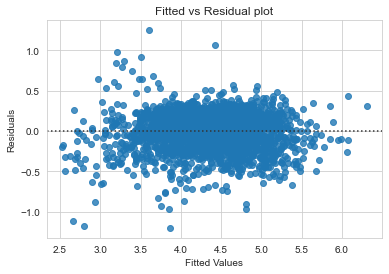

In [ ]:
# plot the fitted values vs residuals
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred, x='Fitted Values', y='Residuals'
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual plot')
plt.show()

There is no discernable pattern in the residuals plot, therefore we can assume linearity in the model's fitted values.

### Independence of Error Terms

Due to the linearity verification plot above, we can assume the error terms are independent

### Normality of Error Terms

### TEST FOR NORMALITY

**What is the test?**

* Error terms/residuals should be normally distributed.

* If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to check the Normality?**

* It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

**How to Make residuals normal?**

* We can apply transformations like log, exponential, arcsinh, etc as per our data.

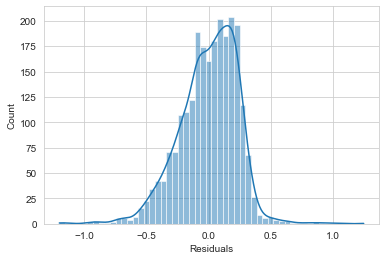

In [ ]:
# visualize the distribution first
sns.histplot(df_pred['Residuals'], kde=True);

The residuals appear mostly normally distributed, but I will run a QQ test for better fidelity

**The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.**

In [ ]:
import pylab
import scipy.stats as stats

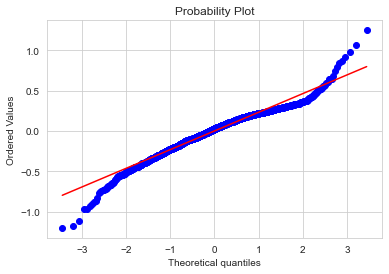

In [ ]:
# create a QQ plot, if normally distributed, plots should form a straigh line
stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show()

In [ ]:
# let's verify with a shapiro test
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9696374535560608, pvalue=3.4198268822808864e-22)

In [ ]:
3.4198268822808864e-22 < 0.05

True

There is some non-normality in the tails as seen in the QQ plot.  Furthermore, the Shapiro test p-value is less than 0.05 which means that the data is not strictly normal.

However, most of the residual plots are on the line and normal, I will assume the residuals are close enough to normally distributed.

### No Heteroscedasticity

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [ ]:
# import the requrired libraries
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ['F statistic', 'p_value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train2)
lzip(name, test)

[('F statistic', 0.9709091485173501), ('p_value', 0.6949555697166623)]

The p-value of teh goldfeldquandt is > 0.05, therefore we can assume homoscedastic.

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# check the model performance on the training set
print('Training Performance:\n')
olsmodel_train_perf = model_performance_regression(
    olsmod11, x_train2, y_train
)
olsmodel_train_perf

Training Performance:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234634,0.183318,0.839441,0.838571,4.417849


In [ ]:
print('Test Performace:\n')
olsmodel_test_perf = model_performance_regression(olsmod11, x_test2, y_test)
olsmodel_test_perf

Test Performace:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23829,0.186209,0.838949,0.836899,4.484195


In [ ]:
# predictions on the test set
pred = olsmod11.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
430,3.616578,3.706851
1169,4.718410,4.793903
165,5.064302,4.913184
1477,4.786908,4.596124
40,4.997685,5.430104
1023,4.143611,3.880554
2534,3.661508,3.631400
3336,5.381095,5.281956
2243,4.678607,4.377239
301,4.319752,4.228625


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price.

## Final Model

In [ ]:
# Write the equation of linear regression
equation = 'normalized_used_price ='
print(equation, end=' ')
for i in range(len(x_train2.columns)):
    if i == 0:
        print(olsmod11.params[i], '+', end=' ')
    elif i != len(x_train2.columns) -1:
        print(
        olsmod11.params[i],
        '* (',
        x_train2.columns[i],
        ')',
        '+',
        end=' ',
    )
    else:
        print(olsmod11.params[i], '* (', x_train2.columns[i], ')')

normalized_used_price = 1.156906965600246 + 0.11480976804543816 * ( screen_inches ) + 0.020835389593434922 * ( main_camera_mp ) + 0.014902605218133688 * ( selfie_camera_mp ) + 0.00013684149599865237 * ( int_memory ) + 0.023751840249572012 * ( ram ) + 0.4108060621056755 * ( normalized_new_price ) + -0.1480678372211408 * ( brand_name_Celkon ) + 0.16196704973608944 * ( brand_name_Infinix ) + 0.09956472776635614 * ( brand_name_Nokia ) + 0.1226233989210872 * ( brand_name_Realme ) + 0.06803856002958891 * ( brand_name_Xiaomi ) + 0.056903941897241656 * ( 4g_yes )


In [ ]:
# check the model parameters
olsmod11.params

const                   1.156907
screen_inches           0.114810
main_camera_mp          0.020835
selfie_camera_mp        0.014903
int_memory              0.000137
ram                     0.023752
normalized_new_price    0.410806
brand_name_Celkon      -0.148068
brand_name_Infinix      0.161967
brand_name_Nokia        0.099565
brand_name_Realme       0.122623
brand_name_Xiaomi       0.068039
4g_yes                  0.056904
dtype: float64

## Actionable Insights and Recommendations 

- The model is able to explain ~84% of the variation in the data within 4.5% of the normalized used price on the test data, which is good.

1. The brand Celkon has a negative effect on the used price.  All other model parameters have a positive impact on used price.

2. Normalized New Price has the greatest positive impact on Normalized Used Price.  A higher new price has a high impact on the used price.

3. Screen size also has a high positive impact on used price.

**Coninuous Variables**

-One unit increase in **Screen Size** increases the used price by **0.114** units.

-One unit increase in **Main Camera MP** increases the used price by **0.02** units.

-One unit increase in **Selfie Camera MP** increases the used price by **0.011** units.

-One unit increase in **Internal Memory** increases the used price by **0.0001** units.

-One unit increase in **Ram** increases the used price by **0.024** units.

-One unit increase in **Normalized New Price** increases the used price by **0.411** units.


**Categorical Variables**

-The brand name **Celkon** *decreases* used price by **-0.148**

-The brand name **Infinix** increases used price by **0.162**

-The brand name **Nokia** increases used price by **0.100**

-The brand name **Realme** increases used price by **0.122**

-The brand name **Xiaomi** increses used price by **0.068**

-Phones with **4g** increses used price by **0.056**


**To maximize used device price profitibility:**
1. Do not accept Celkon phones
2. New Price and Screen Size increases positively affect used price considerably.
3. Camera Mega Pixel increases and Ram increases have slight positive impact on used price.
4. Internal Memory has a marginal affect on used price, it is not an important consideration.

Focus on larger screen sizes and camera quality to maximize used price.  Phones with a larger new price have the greatest affect on used price, which is not surprising.

___